# Scrapping data from ETECSA Web Page

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

res1=requests.get("https://www.etecsa.cu/es/emprendedores/equipos-accesorios/todos?items_per_page=16")

soup1=BeautifulSoup(res1.text,'html.parser')

class_ext1=soup1.select('.card-body-equipos')

name_prod=soup1.select('.card-title-marca')

title_model=soup1.select('.card-title-modelo')

precio=soup1.select('.monto')

moneda=soup1.select('.moneda')

href=soup1.select('.button--aylen')

def colecting_etecsa(class_ext,href):
    lista_fabricantes=[]
    lista_modelos=[]
    lista_precio=[]
    lista_moneda=[]
    link_href=[]
    for i,element in enumerate(href):
        href_elem=href[i].find('a').get('href',None)
        link_href.append(href_elem)
        
    # Since this page has few products, it's easy to get them all
    # and modifying them so we can achieve a clean dataset.
    for idx,item in enumerate(class_ext):
        
        Fabricante = class_ext[idx].getText().split()[0]
        Modelo=class_ext[idx].getText().split()[1]
        Precio=class_ext[idx].getText().split()[2]
        Moneda=class_ext[idx].getText().split()[3]
        lista_fabricantes.append(Fabricante)
        lista_modelos.append(Modelo)
        lista_precio.append(Precio)
        lista_moneda.append(Moneda)
    
    return {"Fabricante":lista_fabricantes,"Modelo":lista_modelos,"Precio":lista_precio,"Moneda":lista_moneda,"Link":link_href}

first_etecsa_page=colecting_etecsa(class_ext1,href)
print(first_etecsa_page)

{'Fabricante': ['TCL', 'Alcatel', 'Samsung', 'TCL', 'TCL', 'Samsung', 'Samsung', 'Mobo', 'Mobo', 'Mobo', 'LG', 'LG', 'TCL', 'TCL', 'LG', 'TCL', 'Alcatel', 'Samsung', 'TCL', 'TCL', 'Samsung', 'Samsung', 'Mobo', 'Mobo', 'Mobo', 'LG', 'LG', 'TCL', 'TCL', 'LG'], 'Modelo': ['T770B', '5029E', 'SM-A21', 'T766J', 'T766A', 'SM-A515F', 'SM-A315G', 'Active', 'Cronos', 'Strong', 'K62', 'K41S', '10', '10L', 'K71', 'T770B', '5029E', 'SM-A21', 'T766J', 'T766A', 'SM-A515F', 'SM-A315G', 'Active', 'Cronos', 'Strong', 'K62', 'K41S', '10', '10L', 'K71'], 'Precio': ['315.00', '200', '299', '310', '245', '420', '375', '95', '24', '52', '370', '231', 'Pro', '315', '510', '315.00', '200', '299', '310', '245', '420', '375', '95', '24', '52', '370', '231', 'Pro', '315', '510'], 'Moneda': ['USD', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', '550', 'MLC', 'MLC', 'USD', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', 'MLC', '550', 'MLC', 'MLC'], 'Link': ['http:

In [2]:
#That way we get the available products in ETECSA Web Page. Let's make a DataFrame.
df=pd.DataFrame(first_etecsa_page)
df

,Fabricante,Modelo,Precio,Moneda,Link
0,TCL,T770B,315.00,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
1,Alcatel,5029E,200,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
2,Samsung,SM-A21,299,MLC,http://www.etecsa.cu/es/equipos-accesorios/tel...
3,TCL,T766J,310,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
4,TCL,T766A,245,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
5,Samsung,SM-A515F,420,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
6,Samsung,SM-A315G,375,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
7,Mobo,Active,95,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
8,Mobo,Cronos,24,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
9,Mobo,Strong,52,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...


In [3]:
#Umm there are some duplicated values. Let's clear them.
df_duplicated=df["Link"].duplicated(keep="first")
df[df_duplicated]

,Fabricante,Modelo,Precio,Moneda,Link
15,TCL,T770B,315.00,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
16,Alcatel,5029E,200,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
17,Samsung,SM-A21,299,MLC,http://www.etecsa.cu/es/equipos-accesorios/tel...
18,TCL,T766J,310,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
19,TCL,T766A,245,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
20,Samsung,SM-A515F,420,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
21,Samsung,SM-A315G,375,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
22,Mobo,Active,95,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
23,Mobo,Cronos,24,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
24,Mobo,Strong,52,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...


In [4]:
#That way we clear the duplicated
df_without_duplicated=df.drop_duplicates(subset="Link",keep="first")
df_without_duplicated

,Fabricante,Modelo,Precio,Moneda,Link
0,TCL,T770B,315.00,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
1,Alcatel,5029E,200,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
2,Samsung,SM-A21,299,MLC,http://www.etecsa.cu/es/equipos-accesorios/tel...
3,TCL,T766J,310,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
4,TCL,T766A,245,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
5,Samsung,SM-A515F,420,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
6,Samsung,SM-A315G,375,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
7,Mobo,Active,95,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
8,Mobo,Cronos,24,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
9,Mobo,Strong,52,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...


In [5]:
#Saving the dataframe into a csv file
df_without_duplicated.to_csv("ETECSA_PRODUCTS.csv",index=None)

In [6]:
#Reading the file and working in a copy of it
df_read = pd.read_csv("ETECSA_PRODUCTS.csv")
df_read_copy = df_read.copy()

In [7]:
#The TCL 10 Pro is not saved properly. Let's fix that
df_read_copy.loc[12, ["Modelo","Precio","Moneda"]]=["10 Pro",550,"MLC"]

In [8]:
#That way the data is ready
df_read_copy

,Fabricante,Modelo,Precio,Moneda,Link
0,TCL,T770B,315.00,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
1,Alcatel,5029E,200,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
2,Samsung,SM-A21,299,MLC,http://www.etecsa.cu/es/equipos-accesorios/tel...
3,TCL,T766J,310,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
4,TCL,T766A,245,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
5,Samsung,SM-A515F,420,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
6,Samsung,SM-A315G,375,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
7,Mobo,Active,95,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
8,Mobo,Cronos,24,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...
9,Mobo,Strong,52,MLC,http://www.etecsa.cu/es/emprendedores/equipos-...


In [9]:
#Checking the type of each column
df_read_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fabricante  15 non-null     object
 1   Modelo      15 non-null     object
 2   Precio      15 non-null     object
 3   Moneda      15 non-null     object
 4   Link        15 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


In [10]:
#Transforming the type of "Precio" column to float64
pd.to_numeric(df_read_copy["Precio"],errors='coerce')

0     315.0
1     200.0
2     299.0
3     310.0
4     245.0
5     420.0
6     375.0
7      95.0
8      24.0
9      52.0
10    370.0
11    231.0
12    550.0
13    315.0
14    510.0
Name: Precio, dtype: float64

In [11]:
#Another way of transforming the type of "Precio" column to float64
df_read_copy[["Precio"]]=(df_read_copy[["Precio"]]).astype(float)

In [12]:
df_read_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fabricante  15 non-null     object 
 1   Modelo      15 non-null     object 
 2   Precio      15 non-null     float64
 3   Moneda      15 non-null     object 
 4   Link        15 non-null     object 
dtypes: float64(1), object(4)
memory usage: 728.0+ bytes


In [13]:
#Getting more information from the data. Only the "Precio" column has numeric values.
df_read_copy.describe()

,Precio
count,15.000000
mean,287.400000
std,152.873804
min,24.000000
25%,215.500000
50%,310.000000
75%,372.500000
max,550.000000


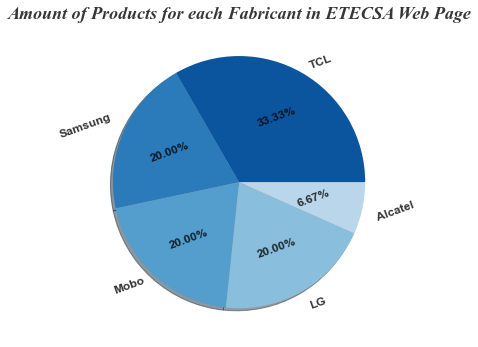

In [14]:
#Let's build some charts to illustrate the data
# First a pie chart with the fabricant name
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Blues_r')
df_read_copy["Fabricante"].value_counts().plot(figsize=(5.8,5.8),kind='pie',shadow=True,label='',autopct = '%.2f%%',textprops = {
                     'fontweight' : 'bold', 
                     'rotation' : '20',
                      "fontsize" : 12,
                     'fontfamily':"Arial",
                        "alpha":0.78})
plt.title("Amount of Products for each Fabricant in ETECSA Web Page",
          fontsize = 18,fontstyle="oblique",fontweight="bold",
          fontfamily="Times New Roman",color="black",horizontalalignment="center",alpha=0.78)
plt.show()

In [15]:
#Sorting the data by price and replacing all the fields that have MLC into USD
df_read_copy["Moneda"]="USD"
df_price=df_read_copy.sort_values("Precio",ascending=False)
df_price

,Fabricante,Modelo,Precio,Moneda,Link
12,TCL,10 Pro,550.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
14,LG,K71,510.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
5,Samsung,SM-A515F,420.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
6,Samsung,SM-A315G,375.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
10,LG,K62,370.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
0,TCL,T770B,315.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
13,TCL,10L,315.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
3,TCL,T766J,310.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...
2,Samsung,SM-A21,299.0,USD,http://www.etecsa.cu/es/equipos-accesorios/tel...
4,TCL,T766A,245.0,USD,http://www.etecsa.cu/es/emprendedores/equipos-...


In [16]:
#Finding the most expensive article and the cheapest one
most_expensive_article=" ".join(list(df_price.values[0][:2]))
most_expensive_price=str(df_price.values[0][2])
cheapest_article=" ".join(list(df_price.values[-1][:2]))
cheapest_price=str(df_price.values[-1][2])
print(f"The most expensive article is {most_expensive_article} that costs {most_expensive_price} USD.")
print(f"The cheapest article is {cheapest_article} that costs {cheapest_price} USD.")

The most expensive article is TCL 10 Pro that costs 550.0 USD.
The cheapest article is Mobo Cronos that costs 24.0 USD.


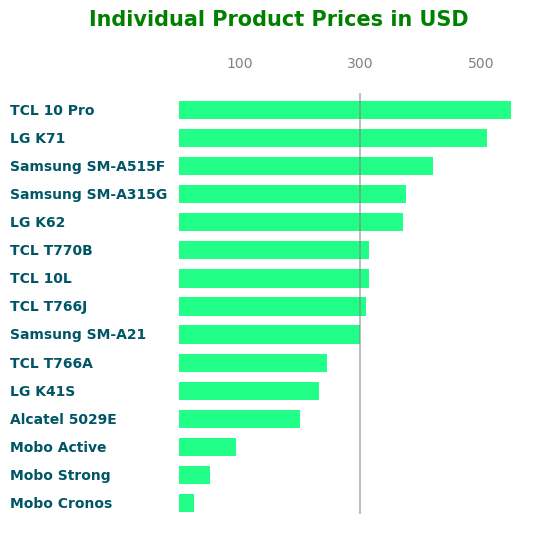

In [17]:
#Adding a horizontal bar plot reading the prize of each product
df_full_name=df_price["Fabricante"]+" "+df_price["Modelo"]

fig,ax =plt.subplots(figsize=(4.5,6),dpi=100)
ax.barh(df_full_name[::-1],df_price["Precio"][::-1],height=0.65,color='#22ff88')  #Using [::-1] we are able to reverse the order of each list
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.text(x=-150,y=17,s='Individual Product Prices in USD',weight='bold',size=15,color="green")
ax.xaxis.tick_top()
ax.set_xticks([100,300,500])
ax.tick_params(top=False,left=False)
ax.tick_params(axis='x',colors='grey')
ax.set_yticks([])
names_models=df_full_name[::-1]
for i,models in zip(range(16),names_models):
    ax.text(x=-280,y=i-0.15,s=models,fontweight="bold",color="#005566",alpha=1)
ax.axvline(x=300,ymin=0.045,ymax=0.97,c='grey',alpha=0.5)
ax.set_facecolor('#FFFFFF')
fig.patch.set_facecolor('w')
plt.show()

## Finally let's save the last dataframe and conclude the project

In [18]:
df_price.to_csv("ETECSA_PRODUCTS_UPDATE.csv",index=None)